In [1]:
from biopandas.pdb import PandasPdb
from math import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
pdb_4m12_1=PandasPdb().read_pdb('/home/ailon/Desktop/python_practice/PDBfile/4M12.pdb')

In [2]:
pdb_4m12_1.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,355,,...,-16.498,11.421,21.473,1.0,46.65,,,N,NaN,388
1,ATOM,2,,CA,,LYS,,A,355,,...,-15.684,12.556,21.030,1.0,45.89,,,C,NaN,390
2,ATOM,3,,C,,LYS,,A,355,,...,-14.192,12.323,21.285,1.0,47.41,,,C,NaN,392
3,ATOM,4,,O,,LYS,,A,355,,...,-13.792,11.679,22.258,1.0,48.26,,,O,NaN,394
4,ATOM,5,,CB,,LYS,,A,355,,...,-16.157,13.875,21.674,1.0,48.66,,,C,NaN,396


In [3]:
pdb_4m12_2=pdb_4m12_1.df['ATOM']

In [4]:
len(pdb_4m12_2)

2129

In [5]:
pdb_4m12_3=pdb_4m12_2[(pdb_4m12_2['chain_id']=='A')]

In [6]:
len(pdb_4m12_2[(pdb_4m12_2['atom_name']=='CA')])

265

In [71]:
pdb_4m12_4=pdb_4m12_3[(pdb_4m12_3['atom_name']=='CB')&(((pdb_4m12_3['alt_loc']=='')|(pdb_4m12_3['alt_loc']=='A')))|(pdb_4m12_3['residue_name']=='GLY')&(pdb_4m12_3['atom_name']=='CA')]

In [72]:
pdb_4m12_4

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
4,ATOM,5,,CB,,LYS,,A,355,,...,-16.157,13.875,21.674,1.0,48.66,,,C,NaN,396
13,ATOM,14,,CB,,TRP,,A,356,,...,-11.477,12.982,18.917,1.0,35.95,,,C,NaN,414
27,ATOM,28,,CB,,VAL,,A,357,,...,-12.312,17.345,22.554,1.0,35.52,,,C,NaN,442
34,ATOM,35,,CB,,ILE,,A,358,,...,-8.844,13.985,26.084,1.0,26.74,,,C,NaN,456
42,ATOM,43,,CB,,ASP,,A,359,,...,-11.410,18.004,29.545,1.0,30.56,,,C,NaN,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,ATOM,2097,,CB,,GLU,,A,614,,...,0.972,-20.127,3.448,1.0,29.86,,,C,NaN,4580
2105,ATOM,2106,,CB,,ILE,,A,615,,...,6.062,-18.612,4.928,1.0,36.60,,,C,NaN,4598
2113,ATOM,2114,,CB,,ALA,,A,616,,...,4.138,-18.114,9.908,1.0,36.11,,,C,NaN,4614
2118,ATOM,2119,,CB,,GLU,,A,617,,...,0.548,-21.663,9.467,1.0,44.59,,,C,NaN,4624


In [73]:
pdb_4m12_5=pdb_4m12_4.loc[:,['residue_name','residue_number','x_coord','y_coord','z_coord']]

In [10]:
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

In [74]:
arr1=np.empty((len(pdb_4m12_5),len(pdb_4m12_5)))

In [75]:
for i in range(len(pdb_4m12_5)):
    for j in range(len(pdb_4m12_5)):
        residue_pair_1=pdb_4m12_5.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair_2=pdb_4m12_5.iloc[j][['x_coord','y_coord','z_coord']].values
        arr1[i][j]=euclidean_distance(residue_pair_1,residue_pair_2)

In [76]:
arr1

array([[ 0.        ,  5.50462515,  5.25350597, ..., 39.66890346,
        41.12198096, 46.36384253],
       [ 5.50462515,  0.        ,  5.74114649, ..., 35.94372716,
        37.87055783, 42.91850992],
       [ 5.25350597,  5.74114649,  0.        , ..., 41.08362809,
        43.10769343, 48.08399494],
       ...,
       [39.66890346, 35.94372716, 41.08362809, ...,  0.        ,
         5.06734467,  7.4182897 ],
       [41.12198096, 37.87055783, 43.10769343, ...,  5.06734467,
         0.        ,  5.67478493],
       [46.36384253, 42.91850992, 48.08399494, ...,  7.4182897 ,
         5.67478493,  0.        ]])

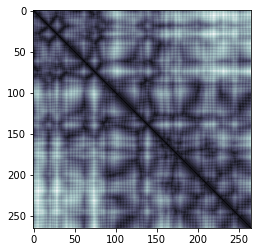

In [14]:
plt.imshow(arr1,cmap='bone')

In [77]:
arr2=np.empty((len(pdb_4m12_5),len(pdb_4m12_5)))

In [78]:
for i in range(len(pdb_4m12_5)):
    for j in range(len(pdb_4m12_5)):
        if arr1[i][j]<=8:
            arr2[i][j]=1
        else:
            arr2[i][j]=0
            

In [79]:
arr2

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

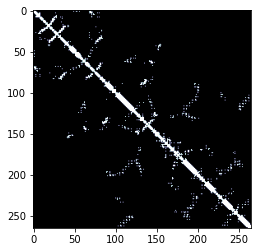

In [18]:
plt.imshow(arr2,cmap='bone')

In [19]:
pdb_4m13_1=PandasPdb().read_pdb('/home/ailon/Desktop/python_practice/PDBfile/4M13.pdb')

In [20]:
pdb_4m13_1.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,355,,...,-16.153,11.759,22.554,1.0,40.71,,,N,NaN,369
1,ATOM,2,,CA,,LYS,,A,355,,...,-15.560,12.613,21.531,1.0,38.86,,,C,NaN,371
2,ATOM,3,,C,,LYS,,A,355,,...,-14.048,12.459,21.529,1.0,40.42,,,C,NaN,373
3,ATOM,4,,O,,LYS,,A,355,,...,-13.472,11.860,22.437,1.0,40.01,,,O,NaN,375
4,ATOM,5,,CB,,LYS,,A,355,,...,-15.916,14.083,21.780,1.0,41.54,,,C,NaN,377


In [21]:
pdb_4m13_2=pdb_4m13_1.df['ATOM']

In [22]:
pdb_4m13_2

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,355,,...,-16.153,11.759,22.554,1.0,40.71,,,N,NaN,369
1,ATOM,2,,CA,,LYS,,A,355,,...,-15.560,12.613,21.531,1.0,38.86,,,C,NaN,371
2,ATOM,3,,C,,LYS,,A,355,,...,-14.048,12.459,21.529,1.0,40.42,,,C,NaN,373
3,ATOM,4,,O,,LYS,,A,355,,...,-13.472,11.860,22.437,1.0,40.01,,,O,NaN,375
4,ATOM,5,,CB,,LYS,,A,355,,...,-15.916,14.083,21.780,1.0,41.54,,,C,NaN,377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,ATOM,2125,,CA,,SER,,A,618,,...,3.438,-24.590,7.601,1.0,49.40,,,C,NaN,4617
2125,ATOM,2126,,C,,SER,,A,618,,...,4.404,-25.390,8.470,1.0,92.49,,,C,NaN,4619
2126,ATOM,2127,,O,,SER,,A,618,,...,5.424,-24.857,8.905,1.0,63.23,,,O,NaN,4621
2127,ATOM,2128,,CB,,SER,,A,618,,...,4.115,-24.221,6.282,1.0,52.92,,,C,NaN,4623


In [23]:
pdb_4m13_3=pdb_4m13_2[(pdb_4m13_2['chain_id']=='A')]

In [24]:
len(pdb_4m13_3)

2129

In [25]:
pdb_4m13_3[(pdb_4m13_3['atom_name']=='CB')&(pdb_4m13_3['alt_loc']!='B')|(pdb_4m13_3['residue_name']=='GLY')&(pdb_4m13_3['atom_name']=='CA')]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
4,ATOM,5,,CB,,LYS,,A,355,,...,-15.916,14.083,21.780,1.0,41.54,,,C,NaN,377
13,ATOM,14,,CB,,TRP,,A,356,,...,-11.575,13.099,18.906,1.0,32.01,,,C,NaN,395
27,ATOM,28,,CB,,VAL,,A,357,,...,-12.109,17.460,22.630,1.0,31.29,,,C,NaN,423
34,ATOM,35,,CB,,ILE,,A,358,,...,-8.641,14.123,26.137,1.0,24.82,,,C,NaN,437
42,ATOM,43,,CB,,ASP,,A,359,,...,-11.028,18.284,29.643,1.0,29.08,,,C,NaN,453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,ATOM,2097,,CB,,GLU,,A,614,,...,0.751,-20.079,3.508,1.0,24.46,,,C,NaN,4561
2105,ATOM,2106,,CB,,ILE,,A,615,,...,5.792,-18.744,5.142,1.0,31.04,,,C,NaN,4579
2113,ATOM,2114,,CB,,ALA,,A,616,,...,3.652,-17.961,10.066,1.0,27.31,,,C,NaN,4595
2118,ATOM,2119,,CB,,GLU,,A,617,,...,0.215,-21.676,9.740,1.0,31.82,,,C,NaN,4605


In [26]:
pdb_4m13_3[pdb_4m13_3['atom_name']=='CA']

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
1,ATOM,2,,CA,,LYS,,A,355,,...,-15.560,12.613,21.531,1.0,38.86,,,C,NaN,371
10,ATOM,11,,CA,,TRP,,A,356,,...,-11.955,12.985,20.386,1.0,33.17,,,C,NaN,389
24,ATOM,25,,CA,,VAL,,A,357,,...,-11.339,16.101,22.649,1.0,26.52,,,C,NaN,417
31,ATOM,32,,CA,,ILE,,A,358,,...,-9.743,15.218,26.022,1.0,22.14,,,C,NaN,431
39,ATOM,40,,CA,,ASP,,A,359,,...,-9.847,17.974,28.693,1.0,25.24,,,C,NaN,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,ATOM,2094,,CA,,GLU,,A,614,,...,1.006,-19.960,5.010,1.0,22.82,,,C,NaN,4555
2102,ATOM,2103,,CA,,ILE,,A,615,,...,4.798,-19.822,5.676,1.0,27.79,,,C,NaN,4573
2110,ATOM,2111,,CA,,ALA,,A,616,,...,4.304,-19.199,9.474,1.0,27.27,,,C,NaN,4589
2115,ATOM,2116,,CA,,GLU,,A,617,,...,1.718,-21.997,9.901,1.0,30.45,,,C,NaN,4599


In [30]:
print(list(a['residue_number']))

[355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553,

In [41]:
a[a['residue_number']==420]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
522,ATOM,523,,CA,A,GLN,,A,420,,...,-5.115,3.283,19.191,0.5,20.65,,,C,NaN,1413
523,ATOM,524,,CA,B,GLN,,A,420,,...,-5.105,3.289,19.178,0.5,20.85,,,C,NaN,1415


In [43]:
a=pdb_4m13_3[(pdb_4m13_3['atom_name']=='CA')&((pdb_4m13_3['alt_loc']=='')|(pdb_4m13_3['alt_loc']=='A'))]

In [44]:
len(a)

264

In [28]:
b=pdb_4m13_3[(pdb_4m13_3['atom_name']=='CB')&(pdb_4m13_3['alt_loc']!='B')|(pdb_4m13_3['residue_name']=='GLY')&(pdb_4m13_3['atom_name']=='CA')]

In [31]:
a=list(a['residue_number'])

In [33]:
b=list(b['residue_number'])

In [38]:
print(b)

[355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554,

In [35]:
for i in range(len(a)):
    if a[i]!= b[i]:
        print (a[i])

420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617


IndexError: list index out of range

In [49]:
pdb_4m13_4=pdb_4m13_3[(pdb_4m13_3['atom_name']=='CB')&((pdb_4m13_3['alt_loc']=='')|(pdb_4m13_3['alt_loc']=='A'))|(pdb_4m13_3['residue_name']=='GLY')&(pdb_4m13_3['atom_name']=='CA')]

In [50]:
pdb_4m13_4

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
4,ATOM,5,,CB,,LYS,,A,355,,...,-15.916,14.083,21.780,1.0,41.54,,,C,NaN,377
13,ATOM,14,,CB,,TRP,,A,356,,...,-11.575,13.099,18.906,1.0,32.01,,,C,NaN,395
27,ATOM,28,,CB,,VAL,,A,357,,...,-12.109,17.460,22.630,1.0,31.29,,,C,NaN,423
34,ATOM,35,,CB,,ILE,,A,358,,...,-8.641,14.123,26.137,1.0,24.82,,,C,NaN,437
42,ATOM,43,,CB,,ASP,,A,359,,...,-11.028,18.284,29.643,1.0,29.08,,,C,NaN,453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,ATOM,2097,,CB,,GLU,,A,614,,...,0.751,-20.079,3.508,1.0,24.46,,,C,NaN,4561
2105,ATOM,2106,,CB,,ILE,,A,615,,...,5.792,-18.744,5.142,1.0,31.04,,,C,NaN,4579
2113,ATOM,2114,,CB,,ALA,,A,616,,...,3.652,-17.961,10.066,1.0,27.31,,,C,NaN,4595
2118,ATOM,2119,,CB,,GLU,,A,617,,...,0.215,-21.676,9.740,1.0,31.82,,,C,NaN,4605


In [51]:
pdb_4m13_5=pdb_4m13_4.loc[:,['residue_name','residue_number','x_coord','y_coord','z_coord']]

In [54]:
arr3=np.empty((len(pdb_4m13_5),len(pdb_4m13_5)))

In [56]:
for i in range(len(pdb_4m13_5)):
    for j in range(len(pdb_4m13_5)):
        residue_pair_1=pdb_4m13_5.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair_2=pdb_4m13_5.iloc[j][['x_coord','y_coord','z_coord']].values
        arr3[i][j]=euclidean_distance(residue_pair_1,residue_pair_2)

In [57]:
arr3

array([[ 0.        ,  5.29834059,  5.15944551, ..., 39.33118808,
        41.03506844, 45.91977113],
       [ 5.29834059,  0.        ,  5.75948374, ..., 35.7033714 ,
        37.84600746, 42.40664896],
       [ 5.15944551,  5.75948374,  0.        , ..., 40.7542692 ,
        43.00766876, 47.62122469],
       ...,
       [39.33118808, 35.7033714 , 40.7542692 , ...,  0.        ,
         5.07153527,  7.32943552],
       [41.03506844, 37.84600746, 43.00766876, ...,  5.07153527,
         0.        ,  5.80041283],
       [45.91977113, 42.40664896, 47.62122469, ...,  7.32943552,
         5.80041283,  0.        ]])

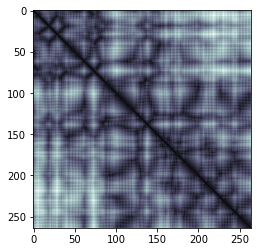

In [60]:
plt.imshow(arr3,cmap='bone')

In [61]:
arr4=np.empty((len(pdb_4m13_5),len(pdb_4m13_5)))

In [62]:
for i in range(len(pdb_4m13_5)):
    for j in range(len(pdb_4m13_5)):
        if arr3[i][j]<=8:
            arr4[i][j]=1
        else:
            arr4[i][j]=0

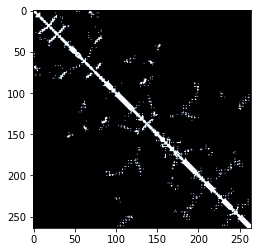

In [64]:
plt.imshow(arr4,cmap='bone')

In [122]:
similarity=0
target=0
for i in range(len(arr2)):
    for j in range(len(arr2)):
        if(arr2[i][j]==1):
            target+=1
            if (arr2[i][j]==arr4[i][j]):
                similarity+=1
print(similarity/target) 

0.9895031490552834


In [82]:
pdb_3oyz_1=PandasPdb().read_pdb('/home/ailon/Desktop/python_practice/PDBfile/3OYZ.pdb')

In [85]:
pdb_3oyz_2=pdb_3oyz_1.df['ATOM']

In [89]:
pdb_3oyz_3=pdb_3oyz_2[pdb_3oyz_2['chain_id']=='A']

In [93]:
pdb_3oyz_4=pdb_3oyz_3[(pdb_3oyz_3['atom_name']=='CB')&((pdb_3oyz_3['alt_loc']=='')|(pdb_3oyz_3['alt_loc']=='A'))|(pdb_3oyz_3['residue_name']=='GLY')&(pdb_3oyz_3['atom_name']=='CA')]

In [94]:
pdb_3oyz_4

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
4,ATOM,5,,CB,,ARG,,A,5,,...,-13.945,-18.120,61.032,1.0,62.18,,,C,NaN,735
15,ATOM,16,,CB,,HIS,,A,6,,...,-17.627,-18.063,57.517,1.0,64.12,,,C,NaN,746
25,ATOM,26,,CB,,ASP,,A,7,,...,-20.250,-22.548,55.533,1.0,65.42,,,C,NaN,756
33,ATOM,34,,CB,,ARG,,A,8,,...,-18.768,-19.476,51.593,1.0,48.74,,,C,NaN,764
44,ATOM,45,,CB,,GLU,,A,9,,...,-13.526,-21.901,51.648,1.0,46.13,,,C,NaN,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,ATOM,2923,,CB,,ALA,,A,428,,...,-21.153,25.912,39.713,1.0,61.58,,,C,NaN,3653
2927,ATOM,2928,,CB,,MET,,A,429,,...,-22.236,29.426,43.389,1.0,64.87,,,C,NaN,3658
2935,ATOM,2936,,CB,,GLU,,A,430,,...,-27.285,26.791,43.194,1.0,70.62,,,C,NaN,3666
2944,ATOM,2945,,CB,,VAL,,A,431,,...,-24.531,22.096,43.386,1.0,68.14,,,C,NaN,3675


In [104]:
pdb_3oyz_5=pdb_3oyz_4.loc[:,['residue_name','residue_number','x_coord','y_coord','z_coord']]

In [102]:
arr5=np.empty((len(pdb_3oyz_5),len(pdb_3oyz_5)))

In [107]:
for i in range(len(pdb_3oyz_5)):
    for j in range(len(pdb_3oyz_5)):
        residue_pair_1=pdb_3oyz_5.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair_2=pdb_3oyz_5.iloc[j][['x_coord','y_coord','z_coord']].values
        arr5[i][j]=euclidean_distance(residue_pair_1,residue_pair_2)

In [108]:
arr5

array([[ 0.        ,  5.09073649,  9.46568592, ..., 50.13130524,
        45.17489754, 42.95573481],
       [ 5.09073649,  0.        ,  5.56161937, ..., 48.06564895,
        43.1288263 , 41.04270024],
       [ 9.46568592,  5.56161937,  0.        , ..., 51.34276061,
        46.46464576, 44.5246928 ],
       ...,
       [50.13130524, 48.06564895, 51.34276061, ...,  0.        ,
         5.44650392,  7.47975414],
       [45.17489754, 43.1288263 , 46.46464576, ...,  5.44650392,
         0.        ,  4.54080312],
       [42.95573481, 41.04270024, 44.5246928 , ...,  7.47975414,
         4.54080312,  0.        ]])

In [109]:
arr6=np.empty((len(arr5),len(arr5)))
for i in range(len(arr5)):
    for j in range(len(arr5)):
        if arr5[i][j]<=8:
            arr6[i][j]=1
        else:
            arr6[i][j]=0

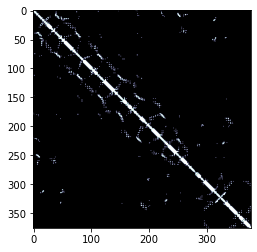

In [112]:
plt.imshow(arr6,cmap='bone')

In [140]:
similarity_list=[]
similarity=0
target=0
for i in range(len(arr6)-len(arr2)+1):
    for j in range(len(arr2)):
        for k in range(len(arr2)):
            if(arr2[j][k]==1):
                target+=1
                if (arr2[j][k]==arr6[j+i][k+i]):
                    similarity+=1
    print(similarity/target) 

0.5199440167949615
0.5230930720783765
0.5248425472358292
0.5258922323303009
0.5245626312106368
0.5242593888500117
0.5243426971908427
0.5232680195941217
0.5218101236295778
0.5203638908327501
0.5188625230612635
0.5184861208304176
0.5181137966302417
0.5172448265520344
0.516678329834383
0.5161826452064381
0.5158687687811304
0.5155120130627479
0.5153401348016647
0.5149405178446466
0.5146122829817721
0.5143456962911127
0.5140718653969026
0.5140832750174947
0.5139538138558433
0.5141034612693115
0.5140865147863048
0.5138958312506248
0.5136941676117854
0.5137392115698624
0.5133524458791395
0.5129461161651504
0.5125644124944335
0.5122257440414935
0.5118664400679797
0.5111966410076977
0.5106387002818074
0.510349526720931
0.5100751825734331
0.5099195241427572
0.5099933434603765
0.5102469259222233
0.510570084788517
0.5107513200585279
0.5110489075499572
0.5113031307998904
0.5115465360391882
0.5118526941917425
0.5122463261021694
0.5125542337298811
0.512822623801095
0.5130403186736286
0.51317057712874

In [147]:
similarity_list=[]

for i in range(len(arr6)-len(arr2)+1):
    similarity=0
    target=0
    for j in range(len(arr2)):
        for k in range(len(arr2)):
            if(arr2[j][k]==1):
                target+=1
                if (arr2[j][k]==arr6[j+i][k+i]):
                    similarity+=1
    similarity_list.append(similarity/target) 


48

In [149]:
similarity_list.index(max(similarity_list))

48

In [148]:
max(similarity_list)

0.5311406578026592

In [144]:
similarity_list

[0.5199440167949615,
 0.5262421273617914,
 0.5283414975507348,
 0.5290412876137159,
 0.5192442267319805,
 0.5227431770468859,
 0.5248425472358292,
 0.5157452764170749,
 0.510146955913226,
 0.5073477956613016,
 0.5038488453463961,
 0.5143456962911127,
 0.5136459062281316,
 0.5059482155353394,
 0.5087473757872638,
 0.5087473757872638,
 0.5108467459762072,
 0.509447165850245,
 0.5122463261021694,
 0.5073477956613016,
 0.5080475857242828,
 0.5087473757872638,
 0.5080475857242828,
 0.5143456962911127,
 0.5108467459762072,
 0.5178446466060181,
 0.5136459062281316,
 0.5087473757872638,
 0.5080475857242828,
 0.5150454863540938,
 0.5017494751574527,
 0.5003498950314905,
 0.5003498950314905,
 0.5010496850944717,
 0.4996501049685094,
 0.48775367389783064,
 0.4905528341497551,
 0.4996501049685094,
 0.4996501049685094,
 0.5038488453463961,
 0.5129461161651504,
 0.5206438068579426,
 0.5241427571728482,
 0.5185444366689993,
 0.5241427571728482,
 0.5227431770468859,
 0.5227431770468859,
 0.52624212736

In [127]:
len(arr6)-len(arr2)+1

113

In [142]:
similarity=0
target=0
for i in range(len(arr2)):
    for j in range(len(arr2)):
        if(arr2[i][j]==1):
            target+=1
            if (arr2[i][j]==arr6[i+48][j+48]):
                similarity+=1
print(similarity/target) 

0.5311406578026592
